In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#IMPORT MODULES

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random as rnd
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# LIBRARIES FOR VISUALIZATION

import seaborn as sns
import matplotlib.pyplot as plt

# LIBRARIES FOR MODELLING AND PREDICTION 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import datasets

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-test2/Titanic_testSUV.csv
/kaggle/input/titanic-train2/Titanic_train.csv


##LOADING THE DATASET

In [2]:
traindf=pd.read_csv('/kaggle/input/titanic-train2/Titanic_train.csv')
testdf=pd.read_csv('/kaggle/input/titanic-test2/Titanic_testSUV.csv')
#traindf.head()
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [3]:
#Statistical details of train dataset
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#datatype details
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## DATA PREPROCESSING

In [5]:
## Combining the train and Test Datasets
traindf_len = len(traindf)
p2733425df = pd.concat([traindf, testdf],axis=0)
p2733425df = p2733425df.reset_index(drop=True)
#p2733425df.head()
p2733425df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
traindf_len

891

## DATA CLEANING

In [7]:
## FINDING THE MISSING VALUES
p2733425df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
#drop the Cabin Feature(Variable)
p2733425df=p2733425df.drop(columns=['Cabin'], axis=1)

In [9]:
## Filling the 'Age' missing values in the dataset using the mean of the numerical Column

#p2733425df['Age'].mean()
p2733425df['Age']=p2733425df['Age'].fillna(p2733425df['Age'].mean())



In [10]:
#Filling the'Fare' missing values in the dataset using the mean of the numerical Column
p2733425df['Fare']=p2733425df['Fare'].fillna(p2733425df['Fare'].mean())

In [11]:
## Filling the 'Embarked' missing values in the dataset using the mode of the categorical Column

p2733425df['Embarked']=p2733425df['Embarked'].fillna(p2733425df['Embarked'].mode()[0])
p2733425df['Embarked'].mode()[0]

'S'

In [12]:
p2733425df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## DATA VISUALIZATION

<AxesSubplot:xlabel='Survived', ylabel='count'>

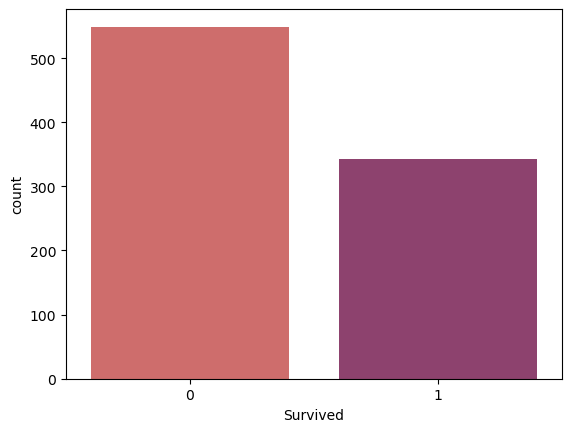

In [13]:
## Checking the categorical attributes
sns.countplot(x = 'Survived', data = traindf, palette = 'flare' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

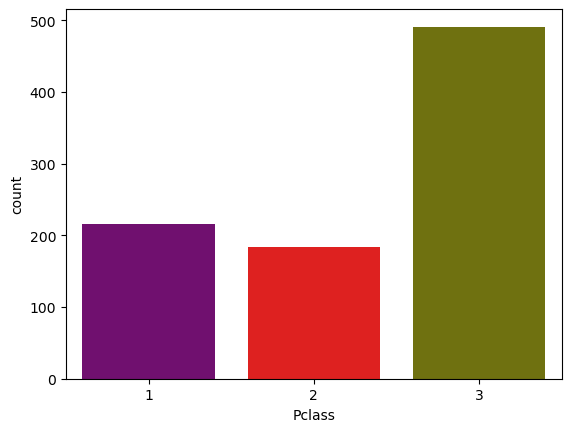

In [14]:
sns.countplot(x = 'Pclass', data = traindf, palette = 'brg' )

<AxesSubplot:xlabel='Sex', ylabel='count'>

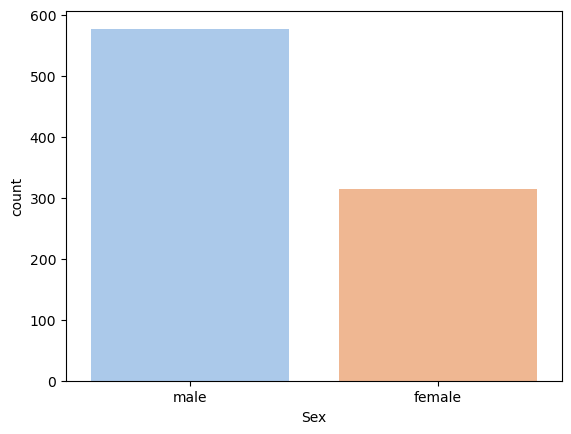

In [15]:
sns.countplot(x = 'Sex', data = traindf, palette = 'pastel' )

<AxesSubplot:xlabel='SibSp', ylabel='count'>

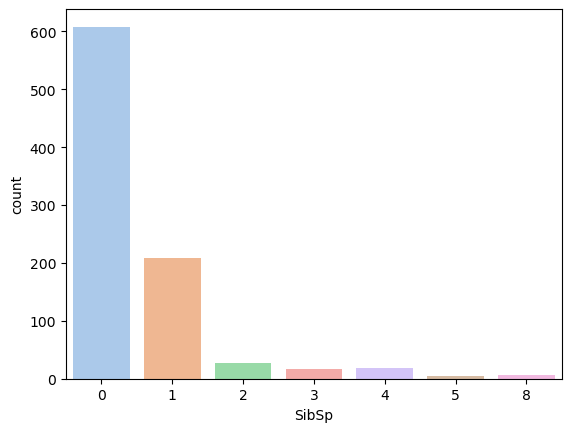

In [16]:
sns.countplot(x = 'SibSp', data = traindf, palette = 'pastel' )

<AxesSubplot:xlabel='Parch', ylabel='count'>

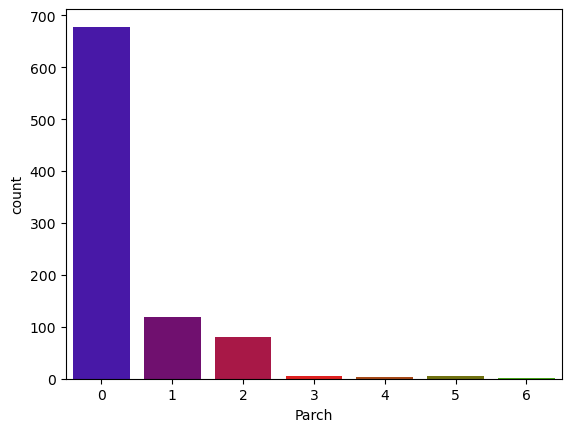

In [17]:
sns.countplot(x = 'Parch', data = traindf, palette = 'brg' )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

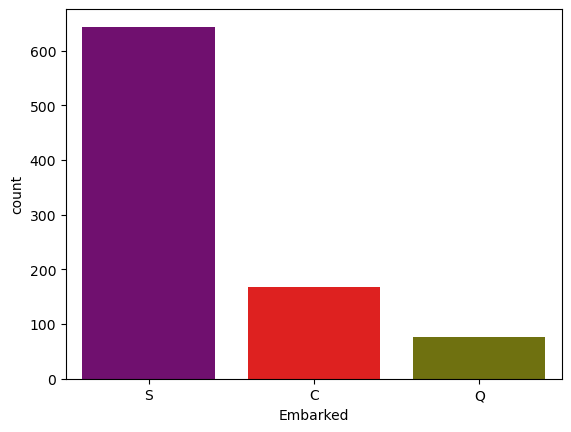

In [18]:
sns.countplot(x = 'Embarked', data = traindf, palette = 'brg' )

<AxesSubplot:xlabel='Survived', ylabel='Density'>

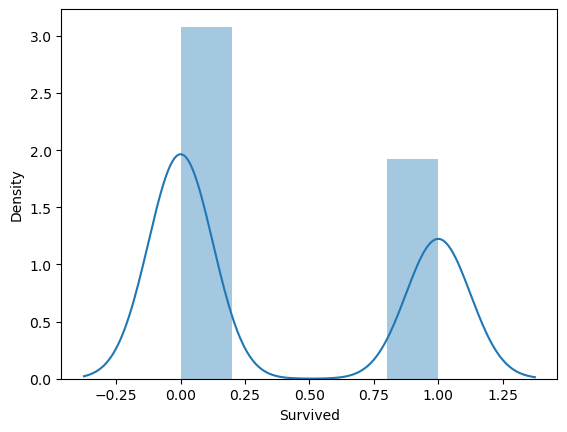

In [19]:
## Checking the numerical attributes
sns.distplot(traindf['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

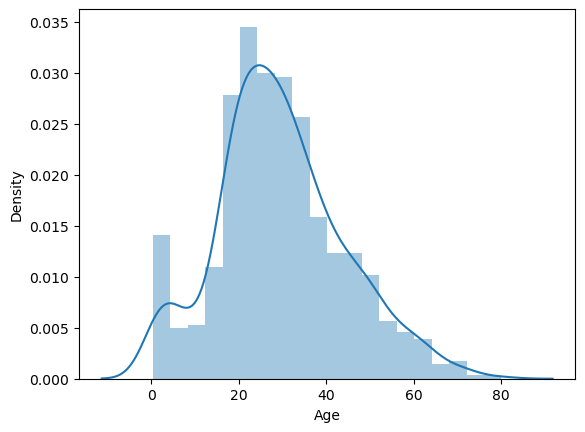

In [20]:
sns.distplot(traindf['Age'])

<AxesSubplot:>

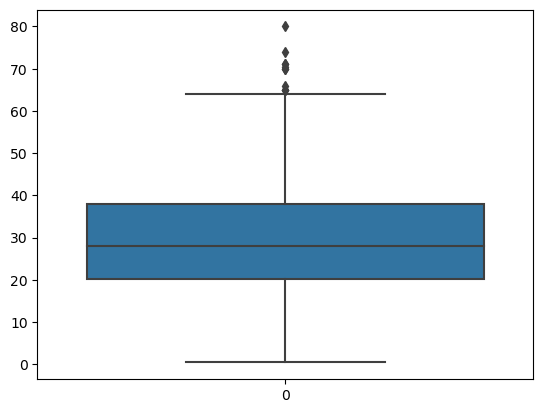

In [21]:
sns.boxplot(traindf['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

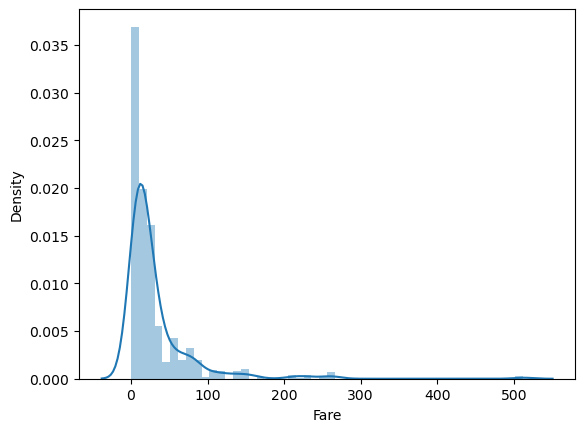

In [22]:
sns.distplot(traindf['Fare'])

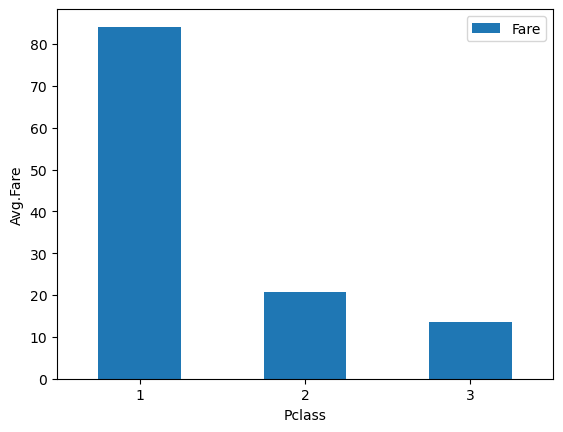

In [23]:
class_fare=traindf.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

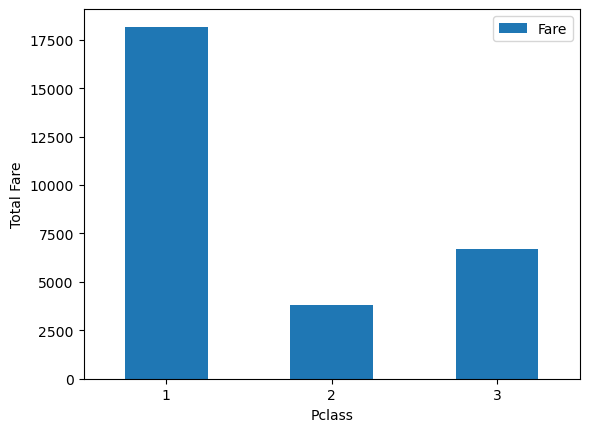

In [24]:
class_fare=traindf.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

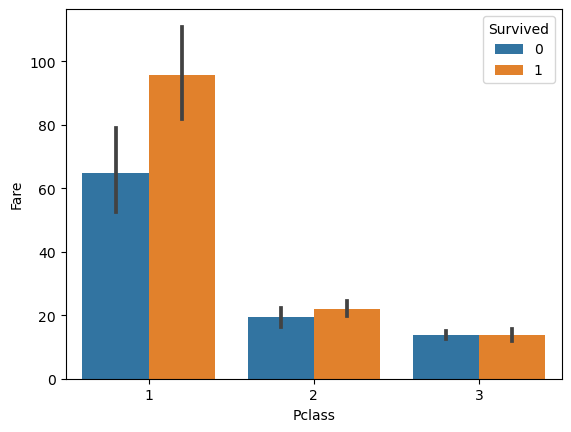

In [25]:
sns.barplot(data=traindf, x='Pclass', y='Fare',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

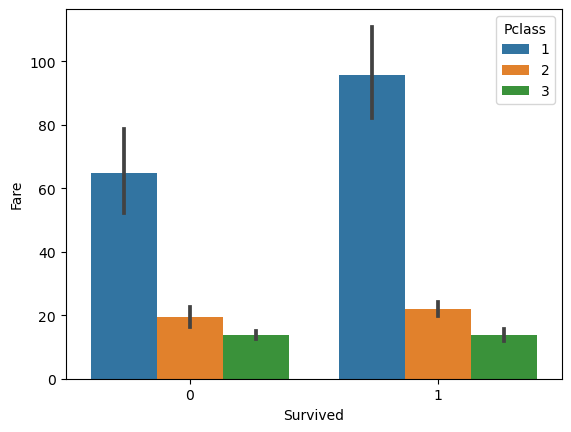

In [26]:
sns.barplot(data=traindf, x='Survived', y='Fare',hue='Pclass')

## DATA NORMALIZATION

<AxesSubplot:xlabel='Fare', ylabel='Density'>

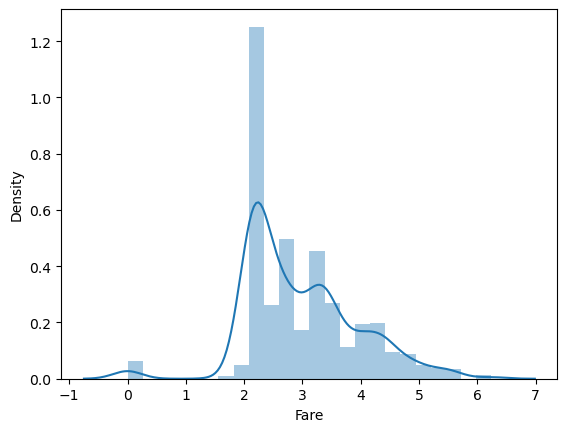

In [27]:
## Log transformation for uniform data distribution
#sns.distplot(traindf['Fare'])
traindf['Fare'] = np.log(traindf['Fare']+1)
sns.distplot(traindf['Fare'])

## CORRELATION MATRIX

<AxesSubplot:>

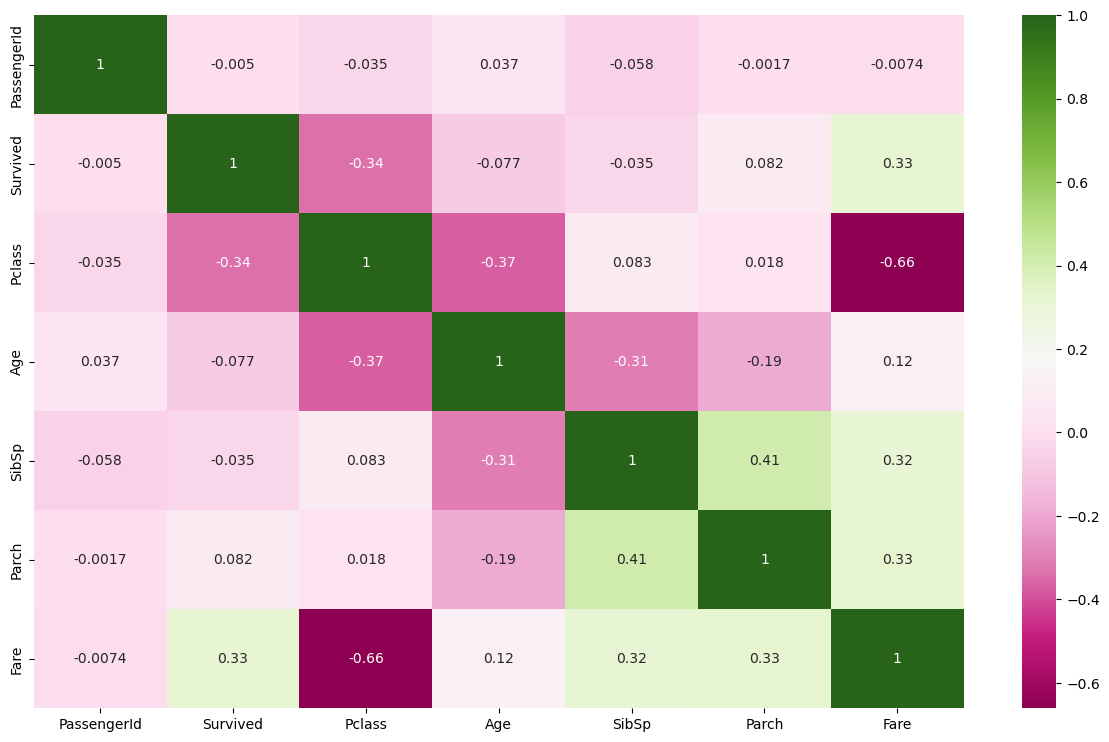

In [28]:
corr = traindf.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='PiYG')

In [29]:
## REMOVAL OF UNNECESSARY FEATURES(VARIABLES)
#p2733425df
p2733425df = p2733425df.drop(columns=['Name', 'Ticket'], axis=1)
p2733425df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## CONVERTING CATEGORICAL VARIABLES TO NUMERICAL

In [30]:
## LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
kln = ['Sex','Embarked']
LE = LabelEncoder()

for p2733425col in kln:
    p2733425df[p2733425col]=LE.fit_transform(p2733425df[p2733425col])
p2733425df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## TRAIN-TEST SPLIT

In [31]:
train=p2733425df.iloc[:traindf_len,:]
test=p2733425df.iloc[traindf_len:,:]
#train.head()
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.5,0,0,7.8292,1
892,893,1,3,0,47.0,1,0,7.0000,2
893,894,0,2,1,62.0,0,0,9.6875,1
894,895,0,3,1,27.0,0,0,8.6625,2
895,896,1,3,0,22.0,1,1,12.2875,2


In [32]:
# APPLYING SPLITTING ON THE INPUT
x = train.drop(columns=['PassengerId','Survived'], axis=1)
y = train['Survived']
x.head()
#y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## MODEL TRAINING AND CLASSIFICATION

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
#Classifying the column
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score=cross_val_score(model, x, y,)
    print('CV Score:', np.mean(score))

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 0.8071748878923767
CV Score: 0.786761659657272


In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 0.7399103139013453
CV Score: 0.7632289247379325


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy: 0.7892376681614349
CV Score: 0.810369719414977


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy: 0.7802690582959642
CV Score: 0.7968991274872889


In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model, x, y)

Accuracy: 0.7892376681614349
CV Score: 0.8125980792166217


In [39]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model, x, y)

Accuracy: 0.8116591928251121
CV Score: 0.8238277572029377


In [40]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model, x, y)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, x, y)

Accuracy: 0.7085201793721974
CV Score: 0.694771200803465


## MODEL PREDICTION WITH FULL DATA

In [42]:
model = LGBMClassifier()
model.fit(x, y)

LGBMClassifier()

In [43]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.5,0,0,7.8292,1
892,893,1,3,0,47.0,1,0,7.0000,2
893,894,0,2,1,62.0,0,0,9.6875,1
894,895,0,3,1,27.0,0,0,8.6625,2
895,896,1,3,0,22.0,1,1,12.2875,2


In [44]:
# SPLIT INPUT FOR TEST DATA
x_test = train.drop(columns=['PassengerId','Survived'], axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [45]:
predt = model.predict(x_test)
predt


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [46]:
# SPLIT INPUT FOR TEST DATA
x_test = test.drop(columns=['PassengerId','Survived'], axis=1)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


In [47]:
predt = model.predict(x_test)
predt

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
y_test = test['Survived']
y_test.head()

891    0
892    1
893    0
894    0
895    1
Name: Survived, dtype: int64

In [49]:
x_train = train.drop(columns=['PassengerId','Survived'], axis=1)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [50]:
y_train= train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dtt = KNeighborsClassifier(n_neighbors=10)
#print(dtt)
KNN = dtt.fit(x_train, y_train)
predictions=KNN.predict(x_test)
accuracy_score(y_test, predictions)

0.6698564593301436

In [52]:
from sklearn.metrics import confusion_matrix
dtm=confusion_matrix(y_test.values, predictions)
dtm

array([[210,  56],
       [ 82,  70]])

## Confusion Matrix

<AxesSubplot:>

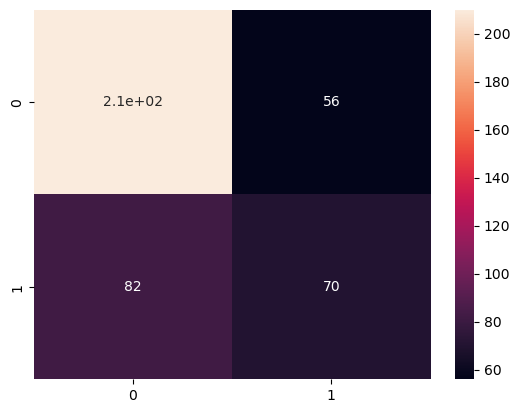

In [53]:
sns.heatmap(dtm, annot=True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       266
           1       0.56      0.46      0.50       152

    accuracy                           0.67       418
   macro avg       0.64      0.62      0.63       418
weighted avg       0.66      0.67      0.66       418



In [55]:
linear_svc=SVC()
linear_svc.fit(x_train, y_train)
y_pred=linear_svc.predict(x_test)

accuracy_score(y_test, y_pred)

0.6555023923444976

<AxesSubplot:>

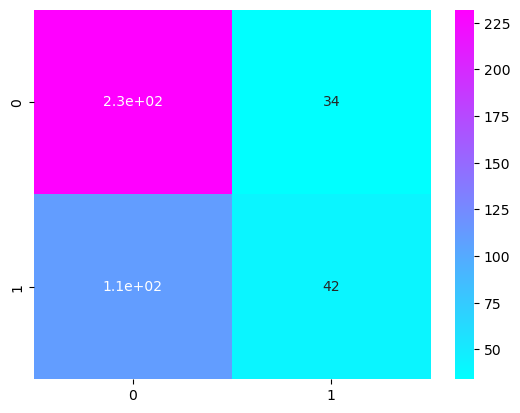

In [56]:
lsvc=confusion_matrix(y_test.values, y_pred)
sns.heatmap(lsvc, annot=True, cmap='cool')

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       266
           1       0.55      0.28      0.37       152

    accuracy                           0.66       418
   macro avg       0.62      0.57      0.57       418
weighted avg       0.63      0.66      0.62       418



In [58]:
dreft=RandomForestClassifier(n_estimators=100)
dreft.fit(x_train, y_train)
pred1=dreft.predict(x_test)
accuracy_score(y_test, pred1)

0.8229665071770335

<AxesSubplot:>

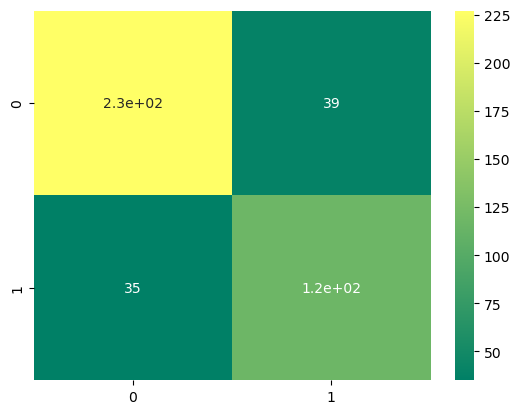

In [59]:
rfcc=confusion_matrix(y_test.values, pred1)
sns.heatmap(rfcc, annot=True, cmap='summer')

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.75      0.77      0.76       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



In [61]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='lbfgs',max_iter=1000)
LR.fit(x_train, y_train)
pred2=LR.predict(x_test)
accuracy_score(y_test, pred2)

0.9401913875598086

<AxesSubplot:>

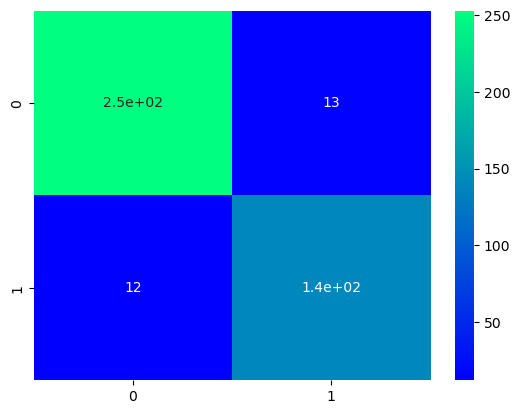

In [62]:
lrmod=confusion_matrix(y_test.values, pred2)
sns.heatmap(lrmod, annot=True, cmap='winter')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.92      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [64]:
#x_train
x_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.735277,0.523008,0.381594,32.204208,1.536476
std,0.836071,0.477990,13.002218,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,29.881138,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [65]:
#kmeans clustering, train
from sklearn.cluster import KMeans
k=5
kmo=KMeans(n_clusters=k, random_state=24)
y_pd=kmo.fit_predict(x_train)
y_pd

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 2,

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [67]:
#predict the labels of test data
kmo.predict(x_test)

array([2, 3, 0, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 3, 0, 1, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2,
       2, 3, 0], dtype=int32)

In [72]:
#Elbow method to determine the optimal k
from sklearn.cluster import KMeans
distortion=[]
for i in range(1,10):
    klm=KMeans(n_clusters=i)
    klm.fit(x_test)
    distortion.append(klm.inertia_)

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svcm=SVC(kernel='linear')
svcm.fit(x_train, y_train)
#y_train

SVC(kernel='linear')

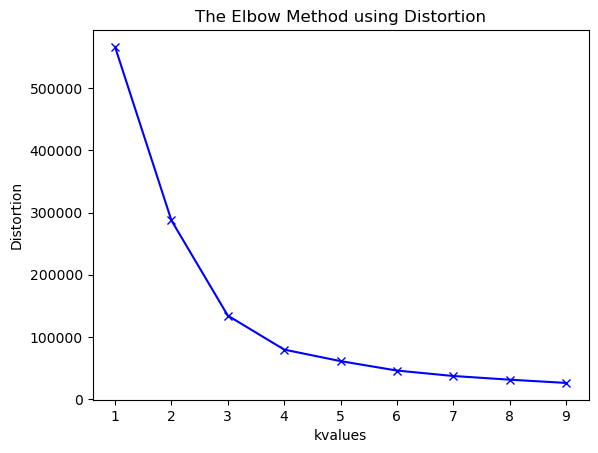

In [75]:
#plotting elbow curve
k=range(1,10)
plt.plot(k, distortion, 'bx-')
plt.xlabel('kvalues')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()